In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import special, optimize

def f(x, lev):
    return special.erf(x / np.sqrt(2.)) - lev

def fprime(x, lev):
    return np.exp(-x ** 2 / 2.) / np.sqrt(np.pi)

def Brent(f, x1, x2, eps):
    a = x1; b = x2; c = 0; d = 0; s = 0; p = 0; q = 0; r = 0
    maxLoops = 100
    counter = 0
    fa = f(a); fb = f(b); fc = fb
    
    if fa * fb >= 0.:
        print 'Error: Root must be bracketed'
        return 0
    if np.fabs(fa) < np.fabs(fb):
        a = x2; b = x1
        
    while counter < maxLoops:
        if (fc * fb) > 0.:
            c = a
            fc = fa
            d = b - a #d is the size of the interval
            e = d
        if np.fabs(fc) < np.fabs(fa):
            a = b
            b = c
            c = a
            fa = fb
            fb = fc
            fc = fa
            
        xMedian = 0.5 * (c - b) #next guess is at the midpoint of the interval
        tol = 2.0 * eps * np.fabs(b) #checking the convergence
        if (np.fabs(xMedian) <= tol) | (fb == 0.):
            return b
        if (np.fabs(fa) > np.fabs(fb)): #inverse quadratic interpolation
            s = fb / fa
            if (a == c):
                p = 2.0 * xMedian * s
                q = 1.0 - s
            else:
                q = fa / fc
                r = fb / fc
                p = s * (2.0 * xMedian * q * (q - r) - (b - a) * (r - 1.0))
                q = (q - 1.0) * (r - 1.0) * (s - 1.0)
            if p > 0: #check whether we're in the bounds
                q += -1
            p = np.fabs(p)
            
            min1 = 3.0 * xMedian * q - np.fabs(tol * q)
            min2 = np.fabs(e * q)
            if (2.0 * p) < np.minimum(min1, min2): #Interpolation was good; accept it
                e = d
                d = p/q 
            else: #Interpolation failed; use bisection
                d = xMedian
                e = d
        else: #Bounds decreasing too slowly; use bisection
            d = xMedian
            e = d
        
        a = b
        fa = fb
        if np.abs(d) > tol:
            b += d
        else:
            b += tol * xMedian / np.fabs(xMedian)
        fb = f(b)
    
    print 'Exceeded maximum iterations'
    return 0
            
def Newton(x0, f, fprime, eps):
    maxLoops = 100
    i = 0
    flag = 0
    error = 100.
    oldError = 100.
    x_old = x0
    f0 = f(x0)
    while flag == 0:
        x_new = x_old - f(x_old) / fprime(x_old)
        fnew = f(x_new)
        error = np.fabs(x_new - x_old)
        if fnew == 0.:
            flag = 1
        elif error <= eps:
            flag = 1
        elif i == maxLoops:
            print 'Error: Reached maximum loops'
            flag = 1
        elif np.fabs(error - oldError) > 500:
            print 'Error: Root search diverging. Please choose another starting point.'
            return 0
        elif fnew == f0:
            print 'Error: Root search stuck in a loop. Please choose another starting point.'
            return 0
        else:
            x_old = x_new
            flag = 0
        i += 1
    return x_new

Scipy version of Brent's Method: [1.000021713322963, 2.0000024438997706, 2.999976992703412]
My version of Brent's Method: [1.00002171332501, 2.0000024438985031, 2.9999769927033912]
Scipy version of Newton's Method: [1.0000217109583875, 2.0000024475674452, 2.9999769954670663]
My version of Newton's method: [1.000021713323145, 2.0000024438993784, 2.9999769927032229]


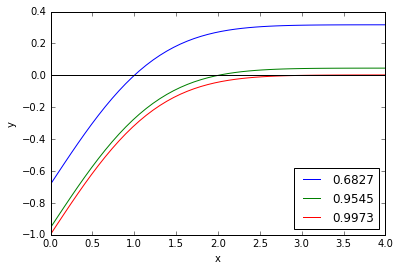

In [26]:
def main():
    
    llev = [0.6827, 0.9545, 0.9973]
    
    x = np.linspace(0., 4.)
    [plt.plot(x, f(x, lev), label = str(lev)) for lev in llev]
    plt.plot(x, 0 * x, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc = 0)
    
    r1 = [optimize.brentq(f, 0., 4., args = (lev)) for lev in llev]
    r2 = [optimize.newton(f, 0., args = (lev,), fprime = fprime) for lev in llev]

    r3 = []
    r4 = []
    for lev in llev:
        def f2(x):
            return f(x, lev)
        def f2prime(x):
            return fprime(x, lev)
        
        r3.append(Brent(f2, 0., 4., 1e-12))
        r4.append(Newton(0., f2, f2prime, 1e-12))
    
    
    
    print 'Scipy version of Brent\'s Method:', r1
    print 'My version of Brent\'s Method:', r3
    print 'Scipy version of Newton\'s Method:', r2
    print 'My version of Newton\'s method:', r4
    
if __name__ == '__main__':
    main()